In [1]:
import numpy as np
import pandas as pd
from collections import Counter 
from sklearn.datasets import load_iris
import torch
from sklearn.model_selection import train_test_split
import torch.nn.functional as Fun
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
input = torch.FloatTensor(iris.data)
target = torch.LongTensor(iris.target)
print("input shape:", input.shape)
print("target shape:", target.shape)

# define train and test sets
input_train, input_test,target_train, target_test = train_test_split(input, target, test_size=0.2, random_state=42)

input shape: torch.Size([150, 4])
target shape: torch.Size([150])


In [3]:
# define BP neural network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(n_feature, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = Fun.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [4]:
# define optimizer and loss function
net = Net(n_feature=4, n_hidden=20, n_output=3)
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

In [7]:
# record train and test loss for visualize
train_loss = []
test_loss= []
accuracies = []

In [10]:
# train the model
for Epoch in range(500):
    net.train()
    output = net(input_train)
    loss = loss_func(output, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # record train loss
    train_loss.append(loss.item())
    # calculate test loss and accuracy
    with torch.no_grad():
        net.eval()
        output_test = net(input_test)
        test_loss_value = loss_func(output_test, target_test)
        test_loss.append(test_loss_value.item())
        
        probs = torch.softmax(output_test, dim=1)
        predicted_classes = torch.argmax(probs, dim=1)
        accuracy = (predicted_classes == target_test).sum().item() / len(target_test)
        accuracies.append(accuracy)
    if Epoch % 50 == 0:
            print(f"Epoch {Epoch}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss_value.item():.4f}, Test Accuracy: {accuracy*100:.2f}%")

Epoch 0, Train Loss: 1.0526, Test Loss: 0.9979, Test Accuracy: 60.00%
Epoch 50, Train Loss: 0.1488, Test Loss: 0.1528, Test Accuracy: 100.00%
Epoch 100, Train Loss: 0.0736, Test Loss: 0.0752, Test Accuracy: 100.00%
Epoch 150, Train Loss: 0.0617, Test Loss: 0.0591, Test Accuracy: 100.00%
Epoch 200, Train Loss: 0.0572, Test Loss: 0.0507, Test Accuracy: 100.00%
Epoch 250, Train Loss: 0.0546, Test Loss: 0.0447, Test Accuracy: 100.00%
Epoch 300, Train Loss: 0.0528, Test Loss: 0.0401, Test Accuracy: 100.00%
Epoch 350, Train Loss: 0.0514, Test Loss: 0.0364, Test Accuracy: 100.00%
Epoch 400, Train Loss: 0.0503, Test Loss: 0.0332, Test Accuracy: 100.00%
Epoch 450, Train Loss: 0.0494, Test Loss: 0.0304, Test Accuracy: 100.00%


In [11]:
# evaluate the model calculate test loss and accuracy
with torch.no_grad():
    output_test = net(input_test)
    probs = Fun.softmax(output_test, dim=1)
    predicted_classes = torch.argmax(probs, dim=1)
    accuracy = (predicted_classes == target_test).sum().item() / len(target_test)
    print(f"Test Loss: {loss_func(output_test, target_test).item()}")
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.027859969064593315
Test Accuracy: 100.00%


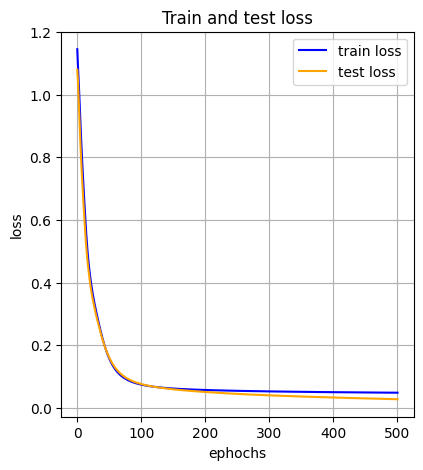

In [16]:
# visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, color='blue', label='train loss')  
plt.plot(test_loss, color='orange', label='test loss') 
plt.xlabel('ephochs')
plt.ylabel('loss')
plt.title('Train and test loss')
plt.legend()
plt.grid(True)


<Figure size 1800x400 with 0 Axes>

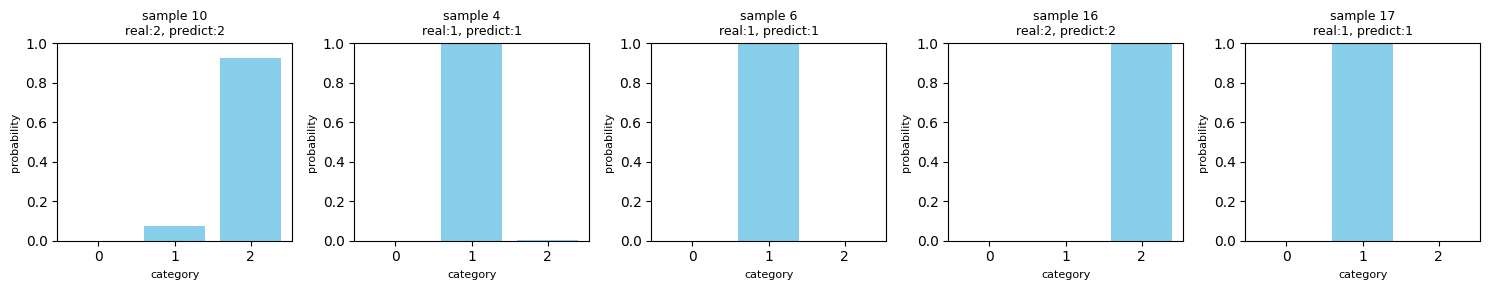

In [ ]:
# visualize the predicted probabilities for a few samples
plt.figure(figsize=(18, 4))
sample_idx = np.random.choice(len(input_test), 5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(sample_idx):
    ax = axes[i]
    t()
plt.show()ax.bar(range(3), probs[idx].numpy(), color='skyblue')
    ax.set_xticks(range(3))
    ax.set_ylim(0, 1)
    true_label = target_test[idx].item()
    pred_label = predicted_classes[idx].item()
    ax.set_title(f'sample {idx}\nreal:{true_label}, predict:{pred_label}', fontsize=9)
    ax.set_xlabel('category', fontsize=8)
    ax.set_ylabel('probability', fontsize=8)
fig.tight_layou